# Flare vetting

In [133]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Band, BoxAnnotation
output_notebook()


from altaipony.lcio import from_path
import pandas as pd
import numpy as np

Loading BokehJS ...

In [134]:
cluster = 'ngc2168'

In [135]:
df = pd.read_csv("../ClusterAnalysis/flares/{}_flares.csv".format(cluster))

In [136]:
df = df.dropna(subset=["ampl_rec", "ed_rec"])
df = df.drop_duplicates()
IDS = df.EPIC.unique()
IDS.shape

In [137]:
ID = IDS[0]
Cs = df.Campaign[df.EPIC == ID].unique()
Cs

In [142]:
c = int(Cs[0])
ID

202059653

In [144]:
try:
    flc = from_path("../DetrendedLightCurves/pony_k2sc_k2_llc_{}-c{:02d}_kepler_v2_lc.fits".format(ID, c), mode="AltaiPony", mission="K2")
except:
    flc = from_path("../DetrendedLightCurves/HAT_{}.fits".format(ID), mode="AltaiPony", mission="K2")
flc = flc[np.where(flc.time!=0.)]

/work1/eilin/Flares_in_Clusters_2/Results/AltaiPony/altaipony/lib64/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/lcio.py:139: ResourceWarning: unclosed file <_io.FileIO name='../DetrendedLightCurves/pony_k2sc_k2_llc_202059653-c00_kepler_v2_lc.fits' mode='rb' closefd=True>
  return _from_path_AltaiPony(path)


In [157]:
params = pd.read_csv("../CDS/stars.csv", names=["ID","C", "RA", "Dec",
                                                "pmem", "outlier", "Teff",
                                                "eTeff", "R", "eR", "LumKepler",
                                                "eLumKepler"])
params[params.ID == ID]

,ID,C,RA,Dec,pmem,outlier,Teff,eTeff,R,eR,LumKepler,eLumKepler
1060,202059653,0,92.51708,23.98517,0.84,-999,4591,197,0.71,0.05,4.548464e+31,6.986072e+30


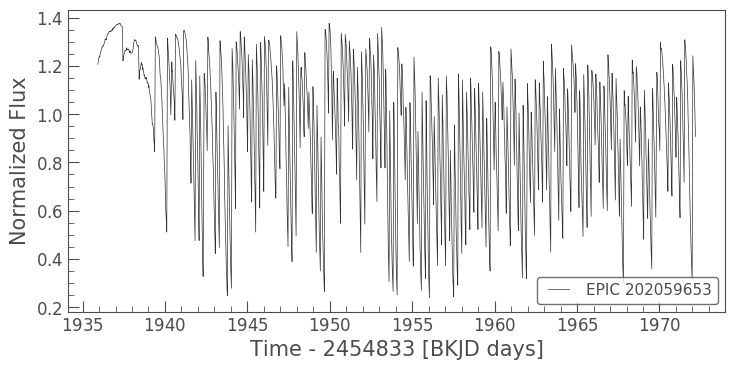

In [149]:
flc.plot()

In [145]:
dff = df[(df.EPIC == ID) & (df.Campaign == c)]
g = lambda x: flc.detrended_flux[np.where(x.tstart==flc.time)[0]+1][0]
dff["peak"] = dff.apply(g, axis=1)
dff

,EPIC,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop,Campaign,total_obs_time,saturation_f10,quality,explanation,total_n_valid_data_points,peak
0,202059653,0.026537,89449.0,89453.0,86.349419,1.609291,36.0,40.0,1936.6978,1936.7795,0.0,820.5,0.419043,0.0,NaN,1641.0,6391.919922
1,202059653,0.026936,89486.0,89496.0,237.169250,2.551511,72.0,82.0,1937.4537,1937.6581,0.0,820.5,0.517662,0.0,NaN,1641.0,6534.905273
2,202059653,0.017323,89507.0,89517.0,193.425858,2.884718,93.0,103.0,1937.8828,1938.0872,0.0,820.5,0.502174,0.0,NaN,1641.0,6414.050781
3,202059653,0.028778,89534.0,89540.0,192.676620,2.219284,119.0,125.0,1938.4344,1938.5570,0.0,820.5,0.512288,0.0,NaN,1641.0,6501.663086
4,202059653,0.008006,89548.0,89551.0,28.850069,1.561915,133.0,136.0,1938.7205,1938.7819,0.0,820.5,0.509228,0.0,NaN,1641.0,6391.333008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,202059653,0.044673,91082.0,91085.0,181.789673,1.684461,1542.0,1545.0,1970.0627,1970.1240,0.0,820.5,0.486675,0.0,NaN,1641.0,6506.287109
82,202059653,0.023611,91101.0,91106.0,147.936890,2.421756,1561.0,1565.0,1970.4509,1970.5531,0.0,820.5,0.371738,0.0,NaN,1641.0,6459.628906
83,202059653,0.022933,91133.0,91143.0,209.884415,2.633620,1590.0,1599.0,1971.1047,1971.3091,0.0,820.5,0.519899,0.0,NaN,1641.0,6415.881836
84,202059653,0.008786,91155.0,91158.0,32.592247,1.678047,1610.0,1613.0,1971.5542,1971.6155,0.0,820.5,0.523625,0.0,NaN,1641.0,6393.999512


In [146]:
LC = pd.DataFrame({"time":flc.time, "flux":flc.detrended_flux})
LC = LC.set_index("time")

In [147]:
source = ColumnDataSource(LC)
flares = ColumnDataSource(dff)

In [148]:
from random import random

from bokeh.layouts import row, column
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.plotting import figure, output_file, show

output_notebook()

s1 = flares

p = figure(plot_height=350, plot_width=900, title="ID {}, Campaign {}".format(ID, c),
           toolbar_location="right",
           #tools= "pan,wheel_zoom,box_zoom,reset, hover",
            tools="lasso_select", #title="Select Here",
           x_range=(np.min(LC.index), np.max(LC.index)))

for i, row in dff.iterrows():
    
    LCsub = LC.iloc[int(row.istart)-1: int(row.istop)+1,:]
    LCsub["upper"] = np.max(LCsub.index)
    LCsub["lower"] = np.min(LCsub.index)
    subset = ColumnDataSource(LCsub)
    p2 = BoxAnnotation(left=np.min(LCsub.index.values), 
                       right=np.max(LCsub.index.values), 
                       fill_alpha=0.5, fill_color='red')

    p.renderers.extend([p2])

p.line('time', 'flux', source=source,line_color="black")
p.xgrid.visible = False
p.ygrid.visible = False
p.circle('tstart', 'peak', source=s1, size=20, alpha=0.6)

#-------------------------------------------------------------------------------

s2 = ColumnDataSource(data=dict(tstart=[], peak=[]))
p2 = figure(plot_width=900, plot_height=300,
            tools="reset,wheel_zoom,box_zoom", title="Watch Here")
p2.circle('tstart', 'peak', source=s2, size=20, alpha=0.6)
p2.line('time', 'flux', source=source,line_color="black")

s1.selected.js_on_change('indices', CustomJS(args=dict(s1=s1, s2=s2,),code="""
        var inds = cb_obj.indices;
        var d1 = s1.data;
        var d2 = s2.data;
        d2['tstart'] = []
        d2['peak'] = []
        for (var i = 0; i < inds.length; i++) {
            d2['tstart'].push(d1['tstart'][inds[i]])
            d2['peak'].push(d1['peak'][inds[i]])
        }
        s2.change.emit();
    """)
)

layout = column(p, p2)

show(layout)

# px.set("start",min);
# px.set("end",max);

Loading BokehJS ...

/work1/eilin/Flares_in_Clusters_2/Results/AltaiPony/altaipony/lib64/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/work1/eilin/Flares_in_Clusters_2/Results/AltaiPony/altaipony/lib64/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/lib64/python3.6/subprocess.py:766: ResourceWarning: subprocess 7515 is still running
  ResourceWarning, source=self)
